# **Reading a MODIS aerosol level 2 data file in HDF format and creating a PM2.5 air quality category map using the relationship between AOD and PM2.5**

*pip install Basemap and  must restart runtime*

In [7]:
import os
os.listdir()

['.config', 'drive', 'sample_data']

In [8]:
%cd drive/MyDrive/sem 8/ce_716/project
 #/MYD04_3K.A2022107.0900.061.2022109190404.hdf

/content/drive/MyDrive/sem 8/ce_716/project


In [3]:
os.listdir()

['.config', 'sample_data']

In [4]:
pip install pyhdf

In [5]:
# not after restarting runtime
pip install --upgrade matplotlib

     |████████████████████████████████| 11.2 MB 7.7 MB/s 
     |████████████████████████████████| 930 kB 48.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [22]:
import mpl_toolkits
import cv2
from google.colab.patches import cv2_imshow

In [7]:
# not after restarting runtime
pip install Basemap

     |████████████████████████████████| 862 kB 10.8 MB/s 
     |████████████████████████████████| 30.5 MB 58.1 MB/s 
     |████████████████████████████████| 6.3 MB 28.2 MB/s 
     |████████████████████████████████| 219 kB 73.1 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=b74132bb3f5e767b1819cec8a885665774f0fa5c0472097c9eebe44731a59795
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [8]:
# not after restarting runtime
pip install matplotlib==2.1.1

     |████████████████████████████████| 36.1 MB 1.1 MB/s 
  Created wheel for matplotlib: filename=matplotlib-2.1.1-cp37-cp37m-linux_x86_64.whl size=10243867 sha256=bff20d4e233ec5b43e7fd93d997764cf60169ff4536ba52ca0bd7dc12fe74812
  Stored in directory: /root/.cache/pip/wheels/f3/7a/d6/021782cff10d8257e030d4a766ca5ed9667fd8758606fbbeff
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.11.2 requires matplotlib>=2.2, but you have matplotlib 2.1.1 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.1.1 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.1.1 which is incompatible.
arviz 

![scale=0.1](https://drive.google.com/uc?export=view&id=1RtBQugD7hYDDnPrNK3nkkONhZ85ZsiM2)

aa


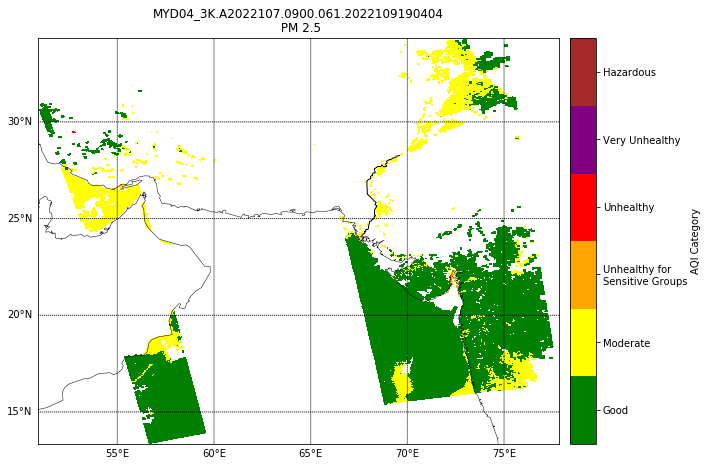

In [30]:
#!/usr/bin/python

#import necessary modules
from pyhdf import SD
import numpy as np
import sys
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


FILE_NAME = 'MYD04_3K.A2022107.0900.061.2022109190404.hdf' # left region
#FILE_NAME = 'MYD04_3K.A2022107.0720.061.2022109190349.hdf' # right region lat 80 100

# open the hdf file for reading
hdf=SD.SD(FILE_NAME)
		
# Get lat and lon info
lat = hdf.select('Latitude')
latitude = lat[:]
min_lat=latitude.min()
max_lat=latitude.max()
lon = hdf.select('Longitude')
longitude = lon[:]
min_lon=longitude.min()
max_lon=longitude.max()
		

sds=hdf.select('Optical_Depth_Land_And_Ocean')
 
#get scale factor for AOD SDS
attributes=sds.attributes()
scale_factor=attributes['scale_factor']

#get valid range for AOD SDS
range=sds.getrange()
min_range=min(range)
max_range=max(range)
		
#get SDS data
data=sds.get()
#get data within valid range

valid_data=data.ravel()
valid_data=[x for x in valid_data if x>=min_range]
valid_data=[x for x in valid_data if x<=max_range]
valid_data=np.asarray(valid_data)

#scale the valid data
valid_data=valid_data*scale_factor
		

slope=24 #
intercept=0.5 #

valid_data=data*scale_factor

# calculating PM2.5 concentration using linear relationship
pm25= slope*valid_data + intercept
		
		
# segmenting the area based on different concentration level of PM2.5  	

data=pm25.astype(float)
data[np.logical_and(data>=0,data <= 12)]=0
data[np.logical_and(data>12,data <= 35.4)]=1
data[np.logical_and(data>35.4,data <= 55.4)]=2
data[np.logical_and(data>55.4,data <= 150.4)]=3
data[np.logical_and(data>150.4,data <= 250.4)]=4
data[data>250.4]=5
data[data < 0] = np.nan

plt.figure(figsize=(10,10))

# fig, (ax1, ax2) = plt.subplots(1, 2)
# # fig.suptitle('Horizontally stacked subplots')
# # ax1.plot(x, y)
# # ax2.plot(x, -y)


# code for map taken from : https://matplotlib.org/basemap/users/cyl.html

# Equidistant Cylindrical Projection : The simplest projection, just displays the world in latitude/longitude coordinates.

#create the map


data = np.ma.masked_array(data, np.isnan(data))
m = Basemap(projection='cyl', resolution='l', llcrnrlat=min_lat, urcrnrlat = max_lat, llcrnrlon=min_lon, urcrnrlon = max_lon)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 5.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 5.), labels=[0, 0, 0, 1])
x, y = m(longitude, latitude)
my_cmap=LinearSegmentedColormap.from_list('mycmap', ['green','yellow','orange','red','purple','brown'],6)
m.pcolormesh(x, y, data,cmap=my_cmap)
plt.clim(0,6)

#create colorbar
cb = m.colorbar()
cb.set_label('AQI Category')
cb.set_ticks([.5, 1.5,2.5,3.5,4.5,5.5])  # force there to be only 7 ticks
cb.set_ticklabels(['Good', 'Moderate', 'Unhealthy for \nSensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])  
              # put text labels on them
			
#title the plot
plotTitle=FILE_NAME[:-4]
# plt.figure(figsize=(10,10))
plt.title('{0}\n {1}'.format(plotTitle, 'PM 2.5'))
ax1 = plt.gcf()
# Show the plot window.
plt.show()

pngfile = '{0}.png'.format(plotTitle)
fig.savefig(pngfile)

# img = cv2.imread("area.png")
# ax2 = plt.imshow(img)

# plt.show()

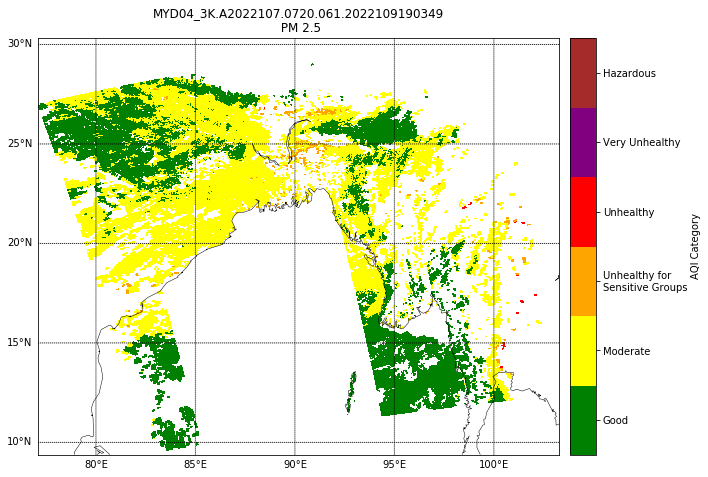

In [32]:
#!/usr/bin/python

#import necessary modules
from pyhdf import SD
import numpy as np
import sys
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


#FILE_NAME = 'MYD04_3K.A2022107.0900.061.2022109190404.hdf' # left region
FILE_NAME = 'MYD04_3K.A2022107.0720.061.2022109190349.hdf' # right region lat 80 100

# open the hdf file for reading
hdf=SD.SD(FILE_NAME)
		
# Get lat and lon info
lat = hdf.select('Latitude')
latitude = lat[:]
min_lat=latitude.min()
max_lat=latitude.max()
lon = hdf.select('Longitude')
longitude = lon[:]
min_lon=longitude.min()
max_lon=longitude.max()
		

sds=hdf.select('Optical_Depth_Land_And_Ocean')
 
#get scale factor for AOD SDS
attributes=sds.attributes()
scale_factor=attributes['scale_factor']

#get valid range for AOD SDS
range=sds.getrange()
min_range=min(range)
max_range=max(range)
		
#get SDS data
data=sds.get()
#get data within valid range

valid_data=data.ravel()
valid_data=[x for x in valid_data if x>=min_range]
valid_data=[x for x in valid_data if x<=max_range]
valid_data=np.asarray(valid_data)

#scale the valid data
valid_data=valid_data*scale_factor
		

slope=24 #
intercept=0.5 #

valid_data=data*scale_factor

# calculating PM2.5 concentration using linear relationship
pm25= slope*valid_data + intercept
		
		
# segmenting the area based on different concentration level of PM2.5  	

data=pm25.astype(float)
data[np.logical_and(data>=0,data <= 12)]=0
data[np.logical_and(data>12,data <= 35.4)]=1
data[np.logical_and(data>35.4,data <= 55.4)]=2
data[np.logical_and(data>55.4,data <= 150.4)]=3
data[np.logical_and(data>150.4,data <= 250.4)]=4
data[data>250.4]=5
data[data < 0] = np.nan

plt.figure(figsize=(10,10))

# code for map taken from : https://matplotlib.org/basemap/users/cyl.html

# Equidistant Cylindrical Projection : The simplest projection, just displays the world in latitude/longitude coordinates.

#create the map


data = np.ma.masked_array(data, np.isnan(data))
m = Basemap(projection='cyl', resolution='l', llcrnrlat=min_lat, urcrnrlat = max_lat, llcrnrlon=min_lon, urcrnrlon = max_lon)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 5.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 5.), labels=[0, 0, 0, 1])
x, y = m(longitude, latitude)
my_cmap=LinearSegmentedColormap.from_list('mycmap', ['green','yellow','orange','red','purple','brown'],6)
m.pcolormesh(x, y, data,cmap=my_cmap)
plt.clim(0,6)

#create colorbar
cb = m.colorbar()
cb.set_label('AQI Category')
cb.set_ticks([.5, 1.5,2.5,3.5,4.5,5.5])  # force there to be only 7 ticks
cb.set_ticklabels(['Good', 'Moderate', 'Unhealthy for \nSensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])  
              # put text labels on them
			
#title the plot
plotTitle=FILE_NAME[:-4]
# plt.figure(figsize=(10,10))
plt.title('{0}\n {1}'.format(plotTitle, 'PM 2.5'))
fig = plt.gcf()
# Show the plot window.
plt.show()

pngfile = '{0}.png'.format(plotTitle)
fig.savefig(pngfile)
